In [3]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Pull historical S&P 500 data (2018-2024)
data = yf.download("^GSPC", start="2018-01-01", end="2024-12-31")

#Preview data
data.head()

print("yfinance and pandas imported!")

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 2.7 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 2.5 MB/s eta 0:00:00a 0:00:01
  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15548 sha256=fb2975c73257cb6767bc0d46060e774794e3f560dc1634fc92ac4728f52215ac
  Stored in directo

Matplotlib is building the font cache; this may take a moment.
/var/folders/3s/q9jl3_4x04d53l5drsfhvcxw0000gn/T/ipykernel_98476/421008297.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("^GSPC", start="2018-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

yfinance and pandas imported!


In [4]:
import sys
!{sys.executable} -m pip install yfinance

!pip install seaborn

from sklearn.cluster import KMeans

In [5]:
import seaborn as sns


In [6]:
# Get S&P 500 data from Yahoo Finance, 2010 to July 2025
sp500 = yf.download('^GSPC', start='2010-01-01', end='2025-07-01')

# Look at the first few rows
sp500.head()

/var/folders/3s/q9jl3_4x04d53l5drsfhvcxw0000gn/T/ipykernel_98476/3808092079.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start='2010-01-01', end='2025-07-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2010-01-04,1132.989990,1133.869995,1116.560059,1116.560059,3991400000
2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2491020000
2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4972660000
2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5270680000
2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4389590000


In [7]:
#OVERALL GOAL: cleaning data, and calculating how much index moves daily so be able to spot patterns using clustering later.
#calculated the daily returns of the S&P 500 index from closing prices, starting from Jan 2010.

#Adj close means Adjusted Closing price
#pct change means percentage change one day to the next
#dropna removes rows with NaN (empty rows or rows with no numbers) -- the first return will be NaN bc there's no day before Jan 1 2010
#inplace = True tells Python to make the change directly in the original Dataframe (i.e. the existing table)
#just df=dropna() drops missing values but makes an additional copy/saves it to a new variable df which is the same thing
#df=dropna(inplace=True) tells Python to update the existing table and not create a new Dataframe.

#Downloaded S&P 500 historical data
sp500 = yf.download('^GSPC', start='2010-01-01', end='2025-07-01')
# FLATTEN the MultiIndex columns
sp500.columns = sp500.columns.get_level_values(0)
#Selected the closing prices
sp500 = sp500[['Close']]
#Calculated the daily percentage return
sp500['Returns'] = sp500['Close'].pct_change()
#Dropped the first row (which had NaN for returns)
sp500.dropna(inplace=True)

sp500.head()

/var/folders/3s/q9jl3_4x04d53l5drsfhvcxw0000gn/T/ipykernel_98476/3150940687.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start='2010-01-01', end='2025-07-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,Returns
Date,,
2010-01-05,1136.520020,0.003116
2010-01-06,1137.140015,0.000546
2010-01-07,1141.689941,0.004001
2010-01-08,1144.979980,0.002882
2010-01-11,1146.979980,0.001747


In [8]:
#Feature Engineering
#creating two new features, volatility and momentum
#volatility = how jumpy the market has been
#momentum = whether it's been trending up or down
#these are calculated using rolling windows, which is like a moving average. 10 days at a time bc 5 trading days = 1 week. so two weeks = 10 days.

# Rolling volatility: standard deviation of returns over past 10 days
sp500['Volatility'] = sp500['Returns'].rolling(window=10).std()

# Rolling momentum: average return over past 10 days
sp500['Momentum'] = sp500['Returns'].rolling(window=10).mean()

# Drop the rows at the beginning that now have NaN (since there's no 10-day history)
sp500.dropna(inplace=True)

# See what we’ve got
sp500.head()


Price,Close,Returns,Volatility,Momentum
Date,,,,
2010-01-19,1150.229980,0.012500,0.007075,0.001534
2010-01-20,1138.040039,-0.010598,0.008002,0.000163
2010-01-21,1116.479980,-0.018945,0.010018,-0.001787
2010-01-22,1091.760010,-0.022141,0.011622,-0.004401
2010-01-25,1096.780029,0.004598,0.011754,-0.004229


In [9]:
#Scaling/Normalising these features
#Clustering models like K-Means use the distance between points. So we need all features on the same scale.
#or else, volatility which might be 0.01 gets ignored; Momemtum which maybe ~0.00002 gets ignored; Returns may dominate the entire thing

#standardising involves turning these features into z-scores, z=(x-mu)/population std.

from sklearn.preprocessing import StandardScaler 

#selecting features which need to be scaled
features=sp500[['Volatility','Returns','Momentum']]

#scaling them using the tool StandardScalar
scaler = StandardScaler()
scaled_features=scaler.fit_transform(features)

#result gives NumPy array where each column has mean =0 and std=1

In [10]:
#Applying K-Means Clustering

from sklearn.cluster import KMeans

#K-means clustering, dividing into 3 clusters/groups,random_state=42 to control the random initialization of K-means -- where it places its first cluster centers. (so we don't get slightly different results every time we run it)

kmeans = KMeans(n_clusters=3, random_state=42)
sp500['Cluster']=kmeans.fit_predict(scaled_features)

sp500.head()

Price,Close,Returns,Volatility,Momentum,Cluster
Date,,,,,
2010-01-19,1150.229980,0.012500,0.007075,0.001534,1
2010-01-20,1138.040039,-0.010598,0.008002,0.000163,1
2010-01-21,1116.479980,-0.018945,0.010018,-0.001787,2
2010-01-22,1091.760010,-0.022141,0.011622,-0.004401,2
2010-01-25,1096.780029,0.004598,0.011754,-0.004229,2


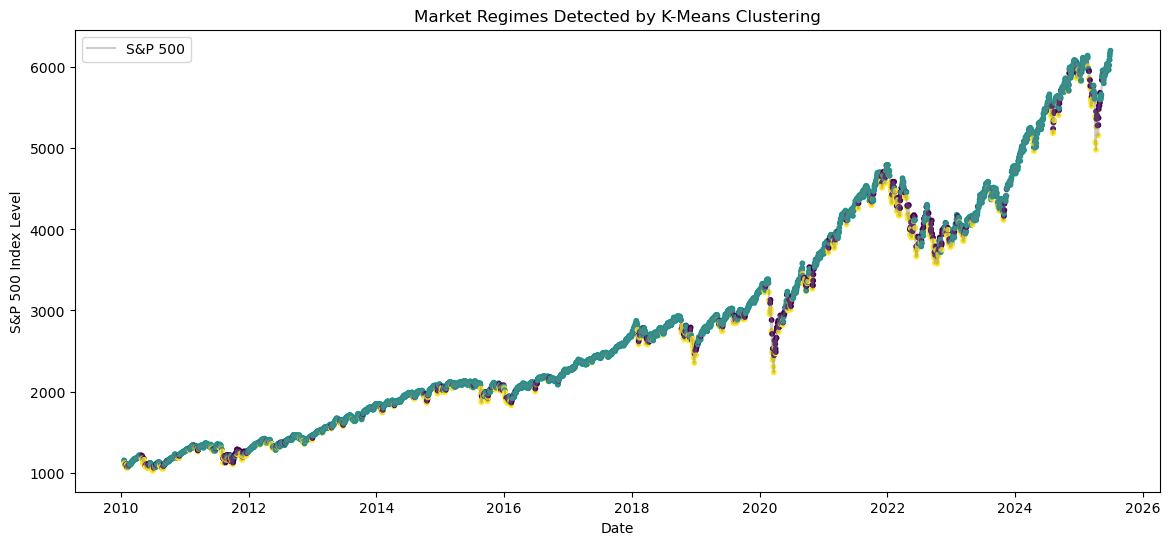

In [11]:
#visualising the market regimes
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(sp500.index, sp500['Close'], label = 'S&P 500', color='gray', alpha=0.4)

#color points by cluster
plt.scatter(sp500.index, sp500['Close'], c=sp500['Cluster'], cmap='viridis', s=10)

plt.title("Market Regimes Detected by K-Means Clustering")
plt.xlabel("Date")
plt.ylabel("S&P 500 Index Level")
plt.legend()
plt.show()

#gray line = S&P 500 Level
#colored dots = what regime K-Means thinks the amrket was in each day
#green during calm uptrends
#purple in bear markets
#yellow in high volatility chaos

In [12]:
#trying to find out what kind of regime (mood of market) each cluster represents.
#to do this we need, average return, volatility and momentum.

#grouping by cluster and looking at the average behavior
sp500.groupby('Cluster')[['Returns', 'Volatility', 'Momentum']].mean()
                  

Price,Returns,Volatility,Momentum
Cluster,,,
0,0.014084,0.016557,0.000458
1,0.000734,0.006688,0.001363
2,-0.014378,0.014142,-0.003874
